In [73]:
from models.bock2013pret import get_model
from tensorflow.keras.models import Model
import tensorflow as tf
import madmom
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from modules.analysis_funcs import get_segmented_data, get_test_peaks

model, _ = get_model()
names = [lay.name for lay in model.layers]

In [27]:
names

['permute_4',
 'conv2d_8',
 'max_pooling2d_8',
 'conv2d_9',
 'max_pooling2d_9',
 'flatten_4',
 'dropout_8',
 'dense_8',
 'dropout_9',
 'dense_9']

In [82]:
audio_fname = "datasets/slurtest_add/slurtest_add_audio/slurtest05_FK.wav"
label_fname = "datasets/slurtest_add/new_annotations/slurtest05_FK.txt"
audio, sample_rate = madmom.io.audio.load_wave_file(audio_fname)
notes = pd.read_csv("datasets/sc_onsets/" + os.path.basename(audio_fname)[:-4] + ".midi.csv")
note_onsets = list(notes["onset"])

cnn_input = get_segmented_data(audio)

true_onsets = np.loadtxt(label_fname, usecols=0)

framerate = 0.01

/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


In [84]:
onset_ps = [int(note_o/framerate) for note_o in note_onsets]

In [144]:
last_w = model.get_layer(names[9]).weights[0].numpy()
sort_idx = np.argsort(last_w, axis=0).reshape(-1)

In [149]:
last_w[sort_idx]
sign_change_i = np.where(last_w[sort_idx]>0)[0][0]

In [150]:
sign_change_i

185

In [176]:
i = 7
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(names[i]).output)
print(names[i])
out = intermediate_layer_model.predict(cnn_input)
pred = model.predict(cnn_input)


dense_16


In [179]:
print(out.shape)
print(pred.shape)

(5244, 256)
(5244, 1)


In [170]:
arr = np.array(onset_ps)[np.array(onset_ps)<200]

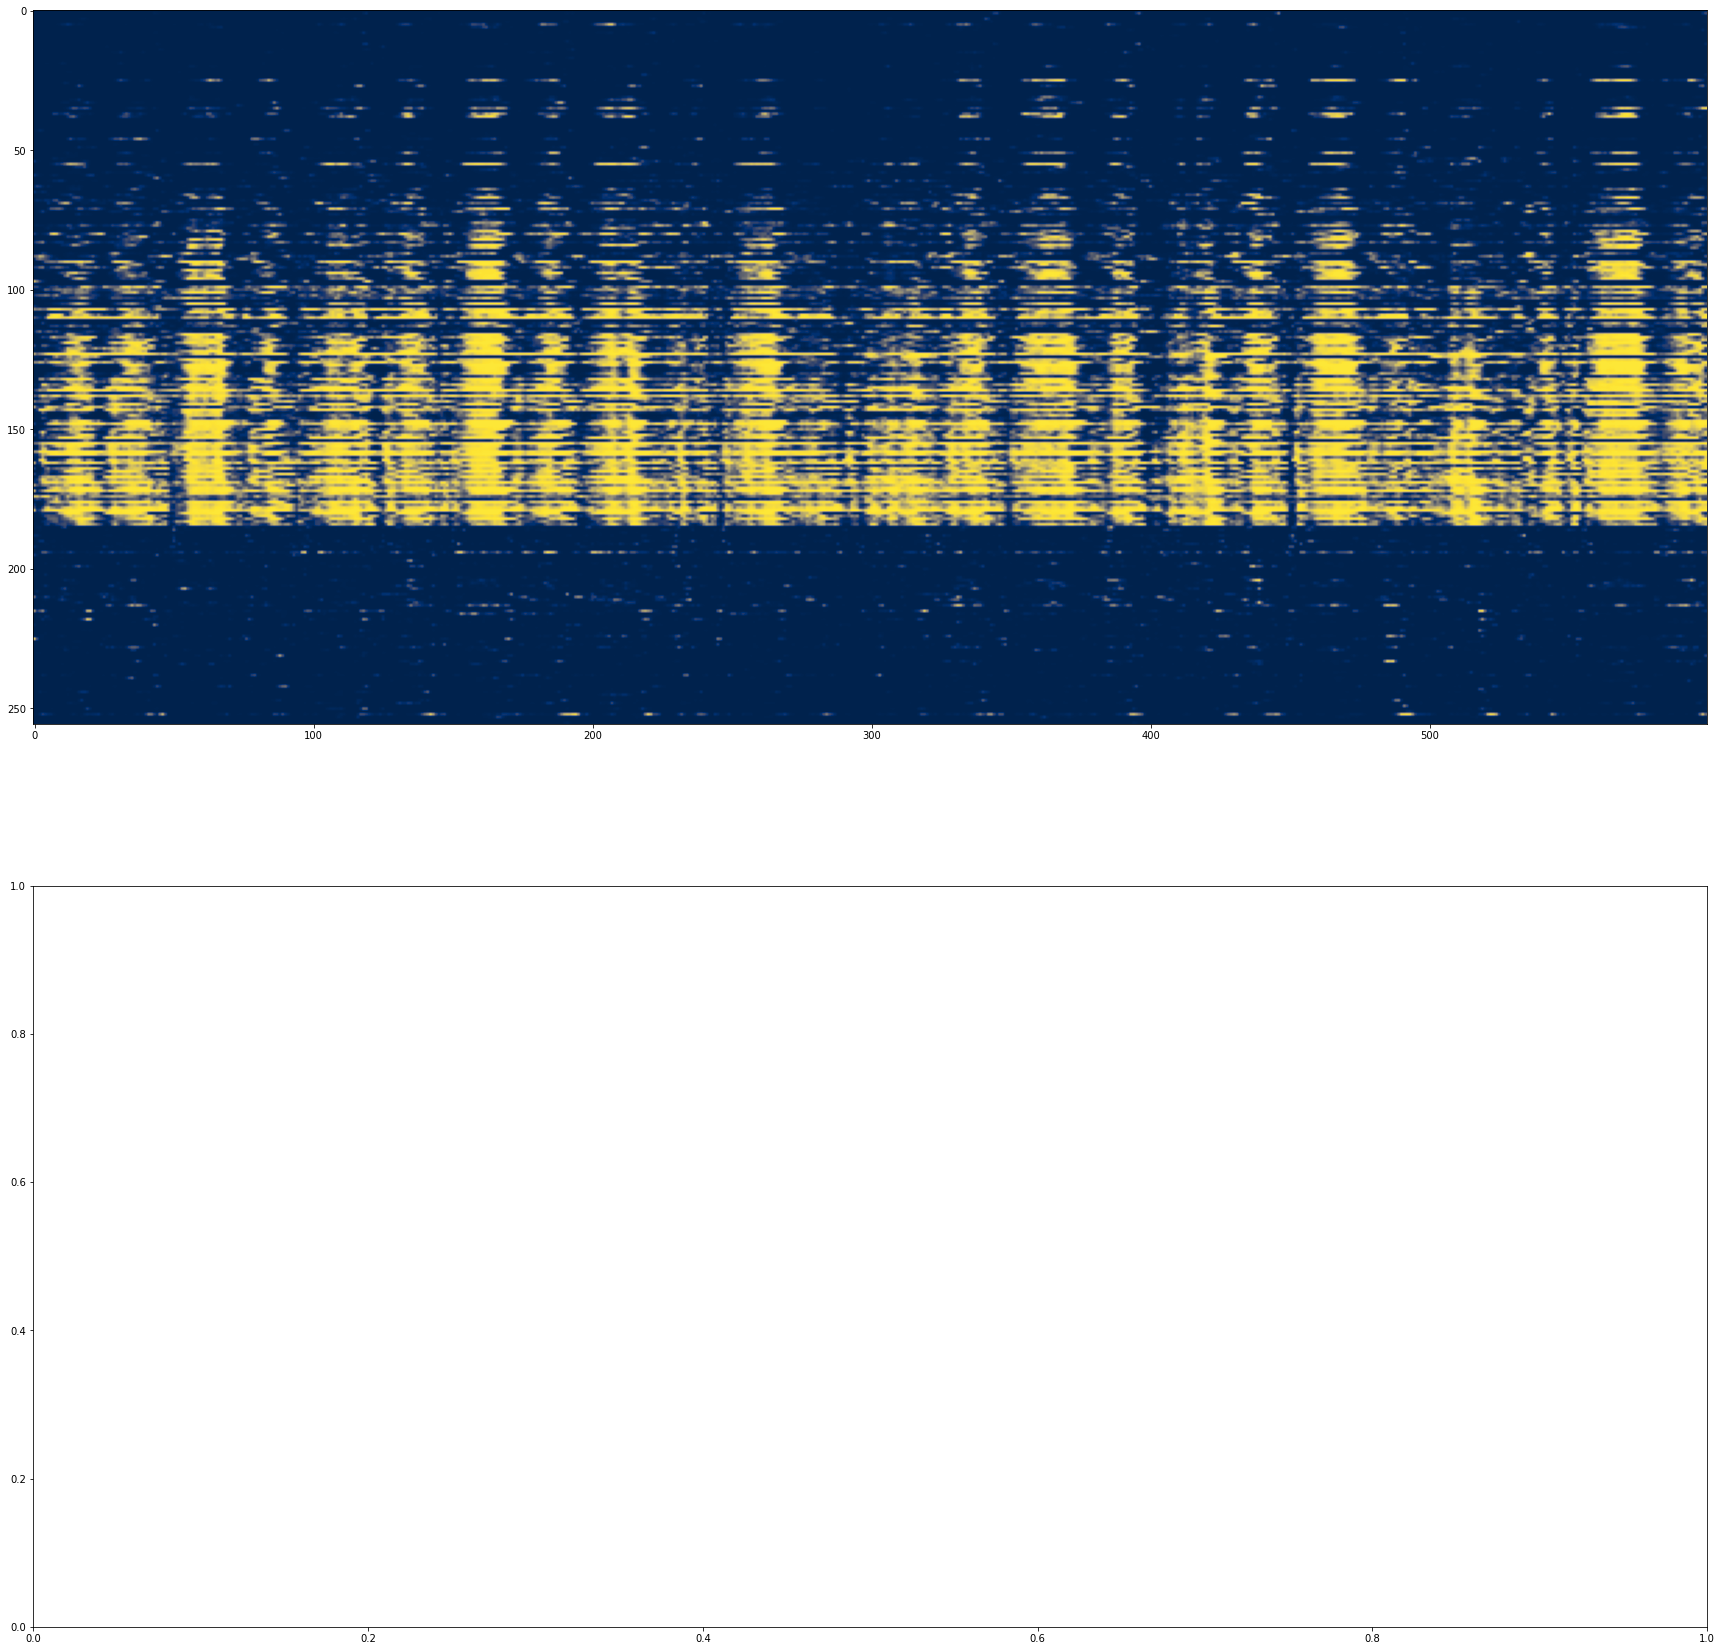

In [196]:
fig, axs = plt.subplots(2, 1, figsize=(30,30))
axs[0].imshow(out[500:1100,sort_idx].transpose(), cmap="cividis")